## Decision Tree

In [1]:
import pandas as pd

In [2]:
## playtennis.csv를 읽어서 DataFrame으로 리턴한다.
# 현재 문자가 저장되어있음을 확인할 수 있다.
# Decision Tree는 숫자가 저장되어있어야한다. 그렇기에 숫자로 변경해야한다.
tennis_data = pd.read_csv('playtennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
## Sunny를 0으로 변경하기
# 칸이름.replace('원래값', 새값)
# 기존의 컬럼이 아닌 Sunny가 0으로 바뀐 새로운 컬럼을 만들어서 리턴한다.
tennis_data.Outlook.replace('Sunny', 0)

0            0
1            0
2     Overcast
3         Rain
4         Rain
5         Rain
6     Overcast
7            0
8            0
9         Rain
10           0
11    Overcast
12    Overcast
13        Rain
Name: Outlook, dtype: object

In [4]:
## tennis_data.Outlook을 확인해보면 그대로임을 확인할 수 있다.
tennis_data.Outlook

0        Sunny
1        Sunny
2     Overcast
3         Rain
4         Rain
5         Rain
6     Overcast
7        Sunny
8        Sunny
9         Rain
10       Sunny
11    Overcast
12    Overcast
13        Rain
Name: Outlook, dtype: object

In [5]:
## 기존값에 새로운 컬럼을 덮어주면 기존값에도 적용된 값을 확인할 수 있다.
# 1) Outlook칸의 Sunny가 0으로 바뀐 새 컬럼을 만들어서 리턴  
# 2) 기존값에 덮어쓰기
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)

In [6]:
## 바뀐 값을 확인하기
tennis_data.Outlook

0            0
1            0
2     Overcast
3         Rain
4         Rain
5         Rain
6     Overcast
7            0
8            0
9         Rain
10           0
11    Overcast
12    Overcast
13        Rain
Name: Outlook, dtype: object

In [7]:
## 새로운 칼럼을 만들지않고 곧장 적용하는 방법
# inplace = True : 컬럼값을 수정
# Overcast를 1로 변경
tennis_data.Outlook.replace('Overcast', 1, inplace = True)

In [8]:
## 확인하기
tennis_data.Outlook

0        0
1        0
2        1
3     Rain
4     Rain
5     Rain
6        1
7        0
8        0
9     Rain
10       0
11       1
12       1
13    Rain
Name: Outlook, dtype: object

In [9]:
# .혹은 []으로 사용해도 가능하다
# Rain을 2로 변경
tennis_data['Outlook'].replace('Rain', 2, inplace = True)

In [10]:
# 확인하기
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,Hot,High,Weak,No
1,0,Hot,High,Strong,No
2,1,Hot,High,Weak,Yes
3,2,Mild,High,Weak,Yes
4,2,Cool,Normal,Weak,Yes
5,2,Cool,Normal,Strong,No
6,1,Cool,Normal,Strong,Yes
7,0,Mild,High,Weak,No
8,0,Cool,Normal,Weak,Yes
9,2,Mild,Normal,Weak,Yes


In [11]:
# 빅데이터 처리 ppt 62p
## temperature 변경하기
# 만약 잘못입력했다면, 위에 값을 불러오는 것부터 다시 시작하기
tennis_data.Temperature.replace('Hot', 1, inplace = True)
tennis_data.Temperature.replace('Mild', 2, inplace = True)
tennis_data.Temperature.replace('Cool', 3, inplace = True)

In [12]:
## Humidit 변경하기
tennis_data.Humidity.replace('High', 1, inplace = True)
tennis_data.Humidity.replace('Normal', 2, inplace = True)

In [13]:
## Wind 변경하기
tennis_data.Wind.replace('Weak', 1, inplace = True)
tennis_data.Wind.replace('Strong', 2, inplace = True)

In [14]:
# PlayTennis 변경하기
tennis_data.PlayTennis.replace('No', 1, inplace = True)
tennis_data.PlayTennis.replace('Yes', 2, inplace = True)

In [15]:
## 확인하기
# PlayTennis는 테니스를 쳤는지의 값이며, 예측하고 싶은 값(종속변수)
# 1이면 안친 것, 2면 친 것
# Outlook, Temperature, Humidity, Wind는 입력값
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,1,1,1
1,0,1,1,2,1
2,1,1,1,1,2
3,2,2,1,1,2
4,2,3,2,1,2
5,2,3,2,2,1
6,1,3,2,2,2
7,0,2,1,1,1
8,0,3,2,1,2
9,2,2,2,1,2


In [16]:
##종속변수와 독립변수 나누주기
# 독립변수 나누기
# .loc : 줄, 칸 일치하는 데이터 찾아서 리턴한다.
# [: (줄 조건), : (칸 조건)]
# 현재 칸조건을 확인해보면 'Outlook'이상 'Wind'이하라는 뜻이다.
tennis_data.loc[: , 'Outlook':'Wind']

,Outlook,Temperature,Humidity,Wind
0,0,1,1,1
1,0,1,1,2
2,1,1,1,1
3,2,2,1,1
4,2,3,2,1
5,2,3,2,2
6,1,3,2,2
7,0,2,1,1
8,0,3,2,1
9,2,2,2,1


In [17]:
## 독립변수 지정
# 보통 독립변수는 X로 지정한다.
X = tennis_data.loc[: , 'Outlook':'Wind']

In [18]:
## 종속변수 나누기
# PlayTennis칸 1개가 있는 DataFrame 리턴
tennis_data[ ["PlayTennis"] ]

,PlayTennis
0,1
1,1
2,2
3,2
4,2
5,1
6,2
7,1
8,2
9,2


In [19]:
# []가 2개이면 DataFrame으로 나온다.
y = tennis_data["PlayTennis"]
y

0     1
1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    2
11    2
12    2
13    1
Name: PlayTennis, dtype: int64

In [20]:
## Decision Tree를 위해서 나누기
# 독립변수랑 종속변수를 섞어서 train, test 데이터로 나누기
from sklearn.model_selection import train_test_split

In [21]:
## 빅데이터 처리 ppt 64p
# 기본인 75%, 25%로 이루어진다.
# test_size를 0.2(20%)로 주어서 80%, 20%로 변경된다.
# 독립변수 X 80%(X_train),독립변수 20%(X_test)
# 종속변수 X 80%(y_train),종속변수 20%(y_test)
# 80%인 X_train, y_train을 Decision Tree를 생성하는데 사용하고, X_test, y_test는 성능테스트에 사용한다.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
## Decision Tree를 만들 객체를 생성
dt_clf = DecisionTreeClassifier()

In [24]:
## Decision Tree 생성
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
## 예측값 구하기
dt_prediction = dt_clf.predict(X_test)

In [26]:
## 예측값 확인하기
dt_prediction

array([1, 1, 2], dtype=int64)

In [27]:
## 진짜값
y_test

11    2
2     2
5     1
Name: PlayTennis, dtype: int64

In [28]:
## 빅데이터 처리 ppt 68p
## 시각화하기
! pip install pydotplus

In [29]:
## 트리의 내용을 텍스트로 출력
from sklearn import tree

In [30]:
# dt_clf : Decision Tree내용이 text(Dot형식)으로 출력
# feature_names : 독립변수 칸 이름을 순서대로 적어야한다.
# class_names: 종속변수의 값을 적어주는데 혹은 [1:2] 값이 적은 순서대로 적어야한다.
dt_dot_data = tree.export_graphviz(
            dt_clf,
            feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind'],
            class_names = ['No', 'Yes']
)
dt_dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="Humidity <= 1.5\\ngini = 0.463\\nsamples = 11\\nvalue = [4, 7]\\nclass = Yes"] ;\n1 [label="Outlook <= 1.0\\ngini = 0.32\\nsamples = 5\\nvalue = [4, 1]\\nclass = No"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]\\nclass = No"] ;\n1 -> 2 ;\n3 [label="Wind <= 1.5\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 1]\\nclass = No"] ;\n1 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = Yes"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = No"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 6\\nvalue = [0, 6]\\nclass = Yes"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [31]:
## 글씨를 그림으로 변경하기
import pydotplus

In [32]:
! pip install graphviz

In [33]:
! pip install graphviz pydot pydotplus

In [34]:
# 1) dt_dot_data로 바꿀 객체 생성
# 2) png로 변경
data = pydotplus.graph_from_dot_data(dt_dot_data).create_png()

In [35]:
from io import BytesIO

In [36]:
from PIL import Image

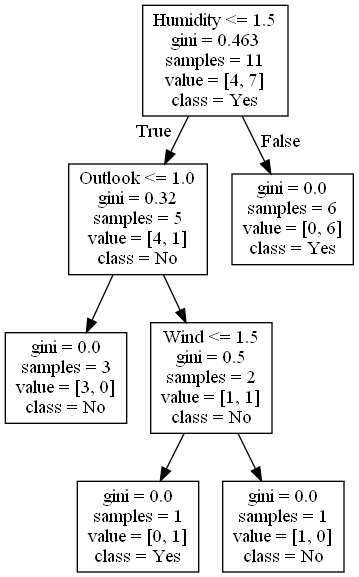

In [37]:
Image.open(BytesIO(data))